In [1]:
import sys
import os
sys.path.insert(0, os.path.dirname(os.getcwd()))
from config import *

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

## Try a reasonable set of hps

In [3]:
clf = DecisionTreeClassifier()   # no pruning case

## Learning curve

mean: 0.8281959540214322
std: 0.008340354974203016


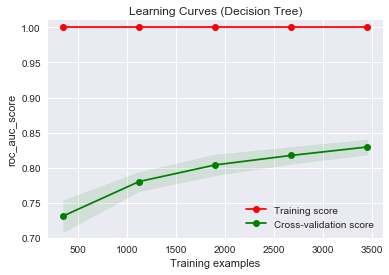

In [4]:
title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4)

# cross validation
scores = cross_val_score(clf, X_train, y_train, scoring=make_scorer(roc_auc_score), cv=cv, n_jobs=4)
print(f'mean: {scores.mean()}')
print(f'std: {scores.std()}')

## Model complexity curve

14


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

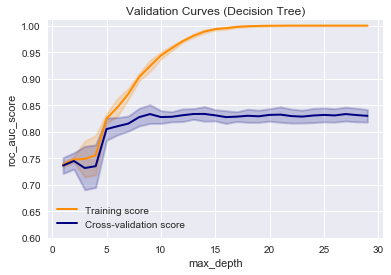

In [22]:
title = "Validation Curves (Decision Tree)"
clf = DecisionTreeClassifier()   # gini, max_features=5, min_samples_split=2, min_samples_leaf=1
plot_validation_curve(clf, title, X_train, y_train, ylim=(0.6, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4, param_name='max_depth', param_range=np.arange(1, 30, 1))

0.0001


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

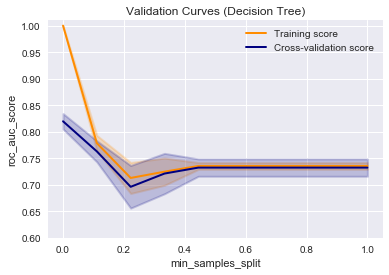

In [34]:
title = "Validation Curves (Decision Tree)"
clf = DecisionTreeClassifier()
plot_validation_curve(clf, title, X_train, y_train, ylim=(0.6, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4, param_name='min_samples_split', param_range=np.linspace(0.0001, 1, 10, endpoint=True))

0.0001


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

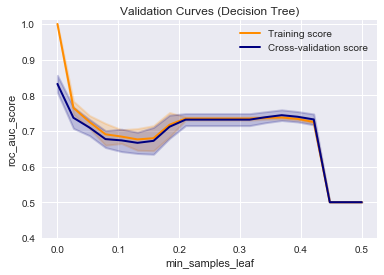

In [35]:
title = "Validation Curves (Decision Tree)"
clf = DecisionTreeClassifier()
plot_validation_curve(clf, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4, param_name='min_samples_leaf', param_range=np.linspace(0.0001, 0.5, 20, endpoint=True))

4


<module 'matplotlib.pyplot' from '/Users/Quintus/anaconda3/envs/cobra_py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

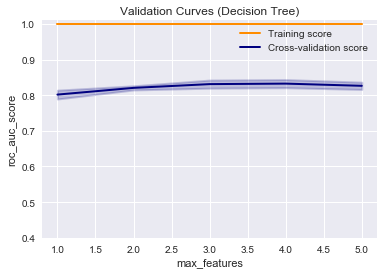

In [12]:
title = "Validation Curves (Decision Tree)"
clf = DecisionTreeClassifier()
plot_validation_curve(clf, title, X_train, y_train, ylim=(0.4, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4, param_name='max_features', param_range=list(range(1, X_train.shape[1]+1)))

## Model Selection

In [14]:
params = {'max_depth': np.arange(1, 15, 1), 
          'min_samples_split': np.linspace(0.0001, 0.5, 5, endpoint=True),
          'min_samples_leaf': np.linspace(0.0001, 0.5, 5, endpoint=True),
          'max_features': range(1, X_train.shape[1]+1),
          'criterion': ['gini', 'entropy'],
         }
clf = DecisionTreeClassifier()
gs = GridSearchCV(clf, params, scoring=make_scorer(roc_auc_score), cv=cv)
gs.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'min_samples_split': array([1.00000e-04, 1.25075e-01, 2.50050e-01, 3.75025e-01, 5.00000e-01]), 'min_samples_leaf': array([1.00000e-04, 1.25075e-01, 2.50050e-01, 3.75025e-01, 5.00000e-01]), 'max_features': range(1, 6), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(roc_auc_score), verbo

In [15]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 5,
 'min_samples_leaf': 0.0001,
 'min_samples_split': 0.0001}

In [16]:
gs.best_score_

0.8362335827519282

## Re-plot learning curve

mean: 0.8447454045164946
std: 0.01204289768508249


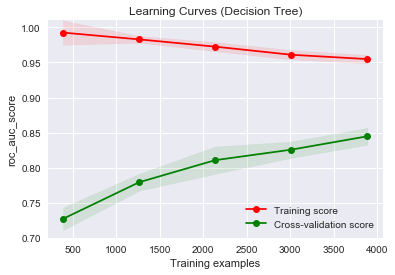

In [8]:
clf = DecisionTreeClassifier(**gs.best_params_)   # pre-pruning to prevent overfitting

title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4)

# cross validation
scores = cross_val_score(clf, X_train, y_train, scoring=make_scorer(roc_auc_score), cv=cv, n_jobs=4)
# print(scores)
print(f'mean: {scores.mean()}')
print(f'std: {scores.std()}')

mean: 0.8330575053330685
std: 0.010843131912806165


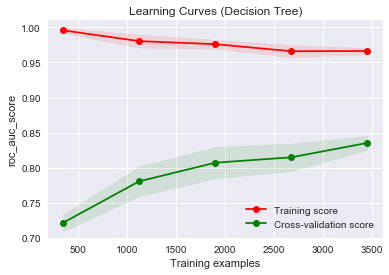

In [17]:
clf = DecisionTreeClassifier(**gs.best_params_)   # pre-pruning to prevent overfitting

title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(clf, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, metric=roc_auc_score, n_jobs=4)

# cross validation
scores = cross_val_score(clf, X_train, y_train, scoring=make_scorer(roc_auc_score), cv=cv, n_jobs=4)
# print(scores)
print(f'mean: {scores.mean()}')
print(f'std: {scores.std()}')

In [28]:
clf = DecisionTreeClassifier(**gs.best_params_) 
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
auc(fpr, tpr)

0.876776178839714